# Welcome word.

> For the  Module 1 Sprint 2 project I have a dataset of Top 50 Spotify of the 2020. This dataset is found in Kaggle, on: https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020


Based on the task description, I work as a data analyst for Spotify and my team's product manager has many ideas and she has prepared a list of questions that she wants me to answer. After great work with my colleague data scientist I received a .csv file with Top 50 songs of 2020 and now I need to look into a data to tell some of the isights.


# Goals.
For this project I've raised these goals/ objectives:


* Demonstrate knowledge in Python Pandas and Numpy libraries.
* Try Seaborn and Matplotlib libraries for graphical description.
* Get to know the dataset in order to be able to tell valuable insights from it.
* Fulfill all needed requirements (including technical ones).

# Technical requirements.

Like any other project there are a couple of technical requirements:
> * Code adherence to the PEP8.
> * Adherence to the requirements.
> * Code performance: code must perform well to give clear answers for the questions.

# Standards and Assumptions.

> <b> 1. </b> I will follow general theoretical requirements, when analysing the Pearson's correlation, outliers and missing values. <br>
<b> 2. </b> I will not drop any features (columns) that will remain unused in this project.<br>
<b> 3. </b> I assume feature engineering will not be performed in this task and no derivative numerical values will be created.<br>
<b> 4. </b> When conducting correlation analysis it is always important to closely look at the features that are strongly correlated. Nature of their correlation can sometimes make no sense in real world.


# Biases.

> <b> 1. </b> Measurement of popularity generally needs additional feature engineering. <b> In this case I will assume that the most popular album or an artist is the one that has the most appearances in the Top 50. </b><br>
> <b> 2. </b> Data is not raw and already refined. Also there are only 50 samples and my task is to check for information based on it's past performance, rather than predicting. <b> Because of this I will keep all the outliers inplace. </b><br>
<b> 3. </b> Many other means to dive into data could have been employed but the ones selected were solely by the personal preference. <br>
<b> 4. </b> For the task to compare one feature performance within different genres I decided to check for the mean values of the feature.

# Domain knowledge.

> I have zero domain knowledge in different features of music. While I understand what features like "loudness", "danceability" mean, however it is hard to interpret results in a wider scale.

# Data analysis.
> In this section I will conduct exploratory data analysis (EDA) without any feature engineering or data modelling.

## Loading the data.
> * Data will be loaded from a .csv file into a Pandas DataFrame.
> * Libraries for further analysis will be imported and aliases created.
> * Also I will print first line of DataFrame, just to be sure that DataFrame object has been created and all columns have right names.
> * use <b> df.info()</b>  and <b> df.descibe() </b> methods to get essential information about the dataset.


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

# Define path to .csv file
path = pathlib.Path(
    r"./spotifytoptracks.csv")

# Read csv file into a Pandas DataFrame
df = pd.read_csv(path, index_col=0)

# Print first row of the DataFrame
df.head(1)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.73,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul


In [2]:
# This outputs information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

In [3]:
# This outputs dataframe description
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


## Data Cleaning.
<b><u> First of all we perform first 3 steps of the task:

> * Handling missing values.
> * Removing duplicate samples and features.
> * Treating the outliers.


In [4]:
# Use `isnull()` method indicating where values are missing in DataFrame `df
# Calculate the sum of all missing values in each column using `.sum()` method

df.isnull().sum()

artist              0
album               0
track_name          0
track_id            0
energy              0
danceability        0
key                 0
loudness            0
acousticness        0
speechiness         0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64

<b><u> Conclusion: </u></b> There are no missing values in the dataset.

In [5]:
# Checking for duplicated values in the rows:

df.duplicated().sum()

0

<b><u> Conclusion: </u></b> There are no duplicated values in the dataset.

Based on the 8.1. section, it's clear that the following features are <b> numerical:
> Energy, Danceability, Loudness, Acousticness, Speechiness, Instrumentalness, Liveness, Valence, Tempo, Duration_ms

To find out which of the features have outliers, <b> boxplots </b> will be drawn.

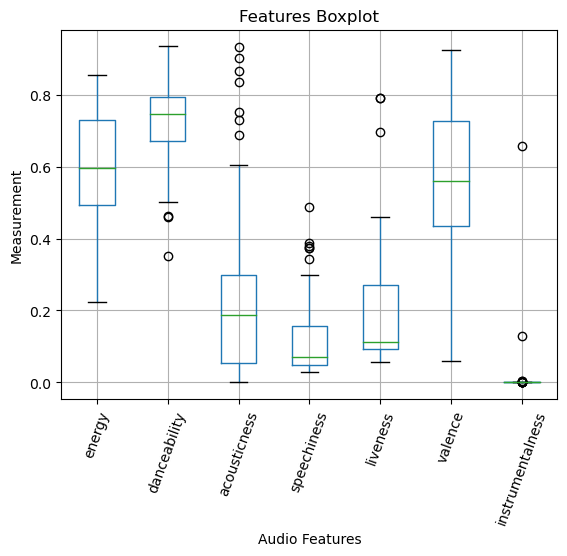

In [6]:
# Plot boxplots for audio features
df.boxplot(column=["energy", "danceability", "acousticness", "speechiness", "liveness", "valence", "instrumentalness"])

# Add plot title, x and y labels, and x tick rotation
plt.title("Features Boxplot")
plt.xlabel("Audio Features")
plt.xticks(rotation=70)
plt.ylabel("Measurement");

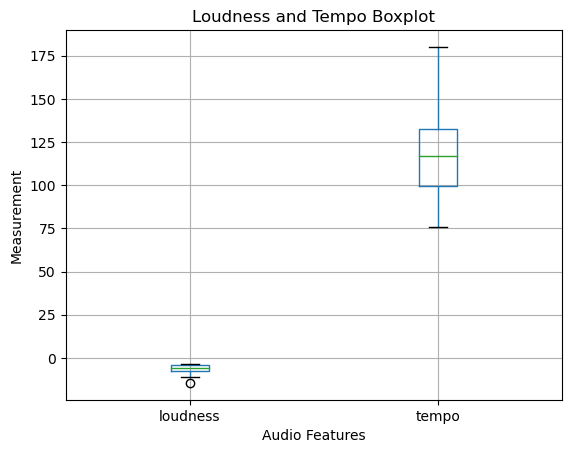

In [7]:
# Boxplot of loudness and tempo
df.boxplot(column=["loudness", "tempo"])

# Adding title, x-label, y-label.
plt.title("Loudness and Tempo Boxplot")
plt.xlabel("Audio Features")
plt.ylabel("Measurement");

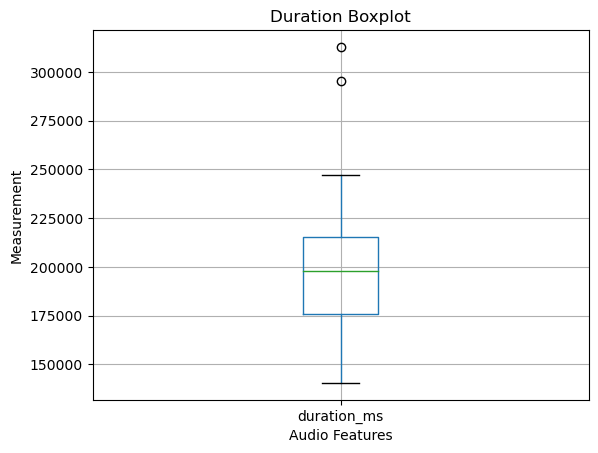

In [8]:
# Boxplot of duration in miliseconds
df.boxplot(column=["duration_ms"])
plt.title("Duration Boxplot")
plt.xlabel("Audio Features")
plt.ylabel("Measurement");

<b><i> Based on Boxplots it's clear that most of the features have outliers.</b> </i>


<b> Ways to treat the outliers: </b>

* <b>Remove the outliers:</b>
One option is to remove the outliers from the dataset. This can be done by setting a threshold for what values are considered outliers and then removing data points that fall outside of that threshold. However, since we only have 50 samples it's not logical to act that way.

* <b>Transform the data:</b> 
Another option is to transform the data using techniques such as log transformation, square root transformation. These techniques can help to normalize the data and reduce the impact of outliers.

* <b>Keep the outliers:</b>
While our task does not involve any estimations or predictive modelling, most appropriate is to keep the outliers in the dataset. This time outliers may represent valuable points in the data and will be explored further in the project.

<b> So overall, this time the best way to treat the outliers is to keep them as they are. </b>

## Exploratory data analysis (EDA).
There I will focus on summarizing and visualizing the main characteristics of a dataset to gain isights from the data, uncover patters, trends.

### Dataset description
* How many observations are there in this dataset?
* How many features this dataset has?
* Which of the features are categorical?
* Which of the features are numeric?


In [9]:
# This outputs information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usag

<b> Dataset (DataFrame) has 50 observations and 16 features. </b>

<b> Based on this it's not clear if some of the numerical features are actually numerical. There is possibility that there are binary or multi-class features included that are of categorical nature.</b>

In [31]:
# Return the number of unique values in each column of a DataFrame
df.nunique()

artist              40
album               45
track_name          50
track_id            50
energy              49
danceability        48
key                 12
loudness            50
acousticness        49
speechiness         48
instrumentalness    19
liveness            47
valence             47
tempo               50
duration_ms         50
genre               16
dtype: int64

"key" feature looks something to go deeper.

In [36]:
# Group by 'key' and count the number of occurrences of each track name
df.groupby('key')['track_name'].size()

key
0     6
1     5
2     4
3     1
4     2
5     1
6     6
7     6
8     6
9     4
10    4
11    5
Name: track_name, dtype: int64

<b> Based on this analysis it can be concluded that 'key' feature is multi-class categorical feature. </b>
<b><u> Conclusion: </u></b><br>
<b> Categorical values:</b> Artist, Album, track_name, key, genre. <br>
<b> Numerical values:</b> energy, track_id, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms.

### Artist analysis
* Are there any artists that have more than 1 popular track? If yes, which and how many?
* Who was the most popular artist?
* How many artists in total have their songs in the top 50?

In [11]:
# This code counts the frequency of each artist in the "artist" column of the dataframe and returns the top 10 results.

df["artist"].value_counts().head(10)

Billie Eilish    3
Dua Lipa         3
Travis Scott     3
Justin Bieber    2
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Cardi B          1
Surfaces         1
Eminem           1
Name: artist, dtype: int64

<b><u> Conclusion: </u></b> Most popular artists: Billie Eilish, Dua Lipa and Travis Scott. Artists that have more than 1 track: Billie Eilish, Dua Lipa, Travis Scott, Justin Bieber, Harry Styles, Lewis Capaldi, Post Malone.

In [12]:
# Get the number of unique artists in the dataframe

df["artist"].nunique()

40

<b><u> Conclusion: </u></b> 40 artists have their tracks in TOP 50.

### Album analysis
* Are there any albums that have more than 1 popular track? If yes, which and how many?
* How many albums in total have their songs in the top 50?

In [13]:
# Get the count of each album and display the top 5

df.album.value_counts().head(5)

Future Nostalgia        3
Hollywood's Bleeding    2
Fine Line               2
Changes                 2
Ride It                 1
Name: album, dtype: int64

<b><u> Conclusion: </u></b> Future Nostalgia, Hollywoods Bleeding, Fine Line, Changes albums have more than 1 popular track.

In [14]:
# Get the number of unique values in the "album" column

df["album"].nunique()

45

<b><u> Conclusion: </u></b> 45 albums have their tracks in TOP 50.

### Track analysis

<b> 1.  Which tracks have a danceability score above 0.7? </b>

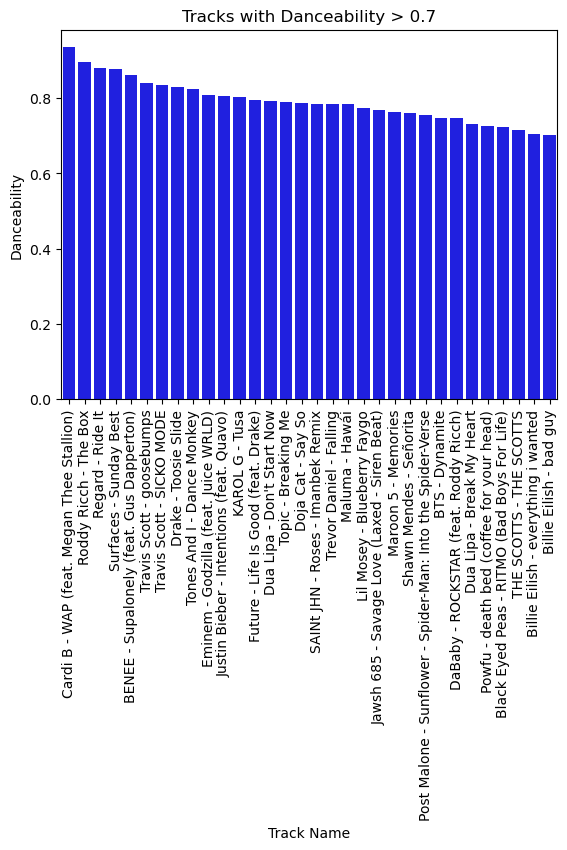

In [15]:
# Select rows where danceability is greater than 0.7 and sort them by danceability in descending order
danceability_df = df[df['danceability'] > 0.7].sort_values(by='danceability', ascending=False)

# Combine artist and track_name columns into a new column called artist_track
danceability_df['artist_track'] = danceability_df['artist'].str.cat(danceability_df['track_name'], sep=' - ')

# Create a bar plot of danceability using seaborn
sns.barplot(x='artist_track', y='danceability', data=danceability_df, color='blue')

# Set the title and axis labels of the plot
plt.title('Tracks with Danceability > 0.7')
plt.xlabel('Track Name')
plt.ylabel('Danceability')

# Rotate x-axis labels by 90 degrees to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [16]:
danceability_df2 = danceability_df[['track_name', 'danceability']].reset_index(drop=True)
print(f'Conclusion: Tracks that have danceability score above 0.7 are:\n\n{danceability_df2}')

Conclusion: Tracks that have danceability score above 0.7 are:

                                       track_name  danceability
0                 WAP (feat. Megan Thee Stallion)         0.935
1                                         The Box         0.896
2                                         Ride It         0.880
3                                     Sunday Best         0.878
4                Supalonely (feat. Gus Dapperton)         0.862
5                                      goosebumps         0.841
6                                      SICKO MODE         0.834
7                                    Toosie Slide         0.830
8                                    Dance Monkey         0.825
9                     Godzilla (feat. Juice WRLD)         0.808
10                       Intentions (feat. Quavo)         0.806
11                                           Tusa         0.803
12                     Life Is Good (feat. Drake)         0.795
13                                Don't 

<b> 2.  Which tracks have a danceability score below 0.4? </b>

In [17]:
df[df['danceability'] < 0.4][['track_name', 'danceability']].sort_values(by='danceability', ascending=False).reset_index(drop=True)

,track_name,danceability
0,lovely (with Khalid),0.351


<b> 3.  Which tracks have their loudness above -5? </b>

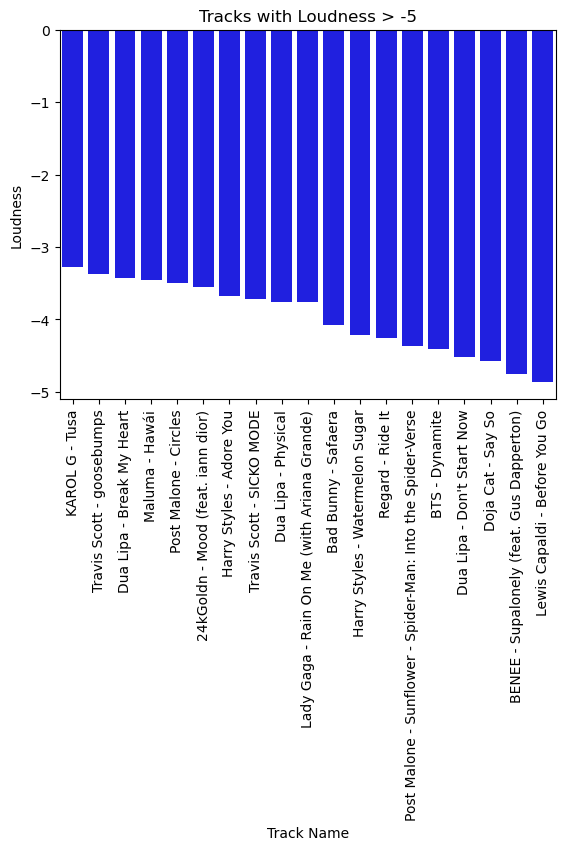

In [18]:
# Select rows where danceability is greater than 0.7 and sort them by danceability in descending order
loudness_df = df[df['loudness'] > -5].sort_values(by='loudness', ascending=False)

# Combine artist and track_name columns into a new column called artist_track
loudness_df['artist_track'] = loudness_df['artist'].str.cat(loudness_df['track_name'], sep=' - ')

# Create a bar plot of danceability using seaborn
sns.barplot(x='artist_track', y='loudness', data=loudness_df, color='blue')

# Set the title and axis labels of the plot
plt.title('Tracks with Loudness > -5')
plt.xlabel('Track Name')
plt.ylabel('Loudness')

# Rotate x-axis labels by 90 degrees to avoid overlapping
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [19]:
loudness_df2 = loudness_df[["track_name", "loudness"]].reset_index(drop=True)
print(f"Conclusion: Tracks that have loudness score above -5 are:\n\n{loudness_df2}")

Conclusion: Tracks that have loudness score above -5 are:

                                       track_name  loudness
0                                            Tusa    -3.280
1                                      goosebumps    -3.370
2                                  Break My Heart    -3.434
3                                           Hawái    -3.454
4                                         Circles    -3.497
5                          Mood (feat. iann dior)    -3.558
6                                       Adore You    -3.675
7                                      SICKO MODE    -3.714
8                                        Physical    -3.756
9                 Rain On Me (with Ariana Grande)    -3.764
10                                        Safaera    -4.074
11                               Watermelon Sugar    -4.209
12                                        Ride It    -4.258
13  Sunflower - Spider-Man: Into the Spider-Verse    -4.368
14                                       

<b> 4.  Which tracks have their loudness below -8? </b>

In [20]:
df[df['loudness'] < -8][['track_name', 'loudness']].sort_values(by='loudness', ascending=False).reset_index(drop=True)

,track_name,loudness
0,Savage Love (Laxed - Siren Beat),-8.520
1,Falling,-8.756
2,HIGHEST IN THE ROOM,-8.764
3,death bed (coffee for your head),-8.765
4,Toosie Slide,-8.820
5,If the World Was Ending - feat. Julia Michaels,-10.086
6,lovely (with Khalid),-10.109
7,bad guy,-10.965
8,everything i wanted,-14.454


<b> 5.  Which track is the <i> longest? </i></b> <br>
<b> 6.  Which track is the <i> shortest?

In [21]:
longest_track = df[["track_name", "duration_ms", "artist"]].sort_values(
    by="duration_ms", ascending=False
)
shortest_track = df[["track_name", "duration_ms", "artist"]].sort_values(
    by="duration_ms"
)

print(
    f"The longest track in the playlist is {longest_track['track_name'].values[0]} by {longest_track['artist'].values[0]}, while the shortest one is {shortest_track['track_name'].values[0]} by {shortest_track['artist'].values[0]}."
)

The longest track in the playlist is SICKO MODE by Travis Scott, while the shortest one is Mood (feat. iann dior) by 24kGoldn.


### Genre analysis

<b> 1. Which genre is the most popular? </b>

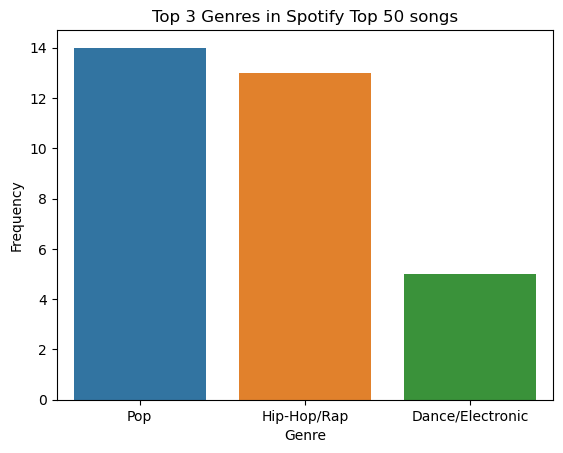

In [22]:
# Retrieves the top 5 genres from the "genre" column in the dataframe
top_genres = df["genre"].value_counts().nlargest(3)

# Creates a barplot graph using the retrieved genres data
sns.barplot(x=top_genres.index, y=top_genres.values)

# Adding a title, axis labels, rotation
plt.title("Top 3 Genres in Spotify Top 50 songs")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

<b><u> Conclusion: </u></b> Pop is the most popular genre.

<b> 2. Which genres have just one song on the top 50? </b>

In [23]:
# Check for unique genres
unique_genres = df["genre"].value_counts() == 1

# Filter out non-unique genres
unique_genres_list = df.loc[df["genre"].isin(unique_genres[unique_genres].index), "genre"].reset_index(drop=True)

# Print list of unique genres
print(f' Conclusion: These are genres that have just one song on the top 50:\n\n{unique_genres_list}')

 Conclusion: These are genres that have just one song on the top 50:

0                              Nu-disco
1               R&B/Hip-Hop alternative
2                         Pop/Soft Rock
3                               Pop rap
4                          Hip-Hop/Trap
5                       Dance-pop/Disco
6                             Disco-pop
7                  Dreampop/Hip-Hop/R&B
8    Alternative/reggaeton/experimental
9                           Chamber pop
Name: genre, dtype: object


<b> 3. How many genres in total are represented in the top 50? </b>

In [24]:
df['genre'].nunique()

16

### Correlation analysis
For this task Pearson's correlation coefficient will be employed. Pearson's correlation coefficient is a measure of the linear relationship between two variables. It takes values between -1 and 1, where -1 indicates a perfect negative linear relationship, 0 indicates no linear relationship, and 1 indicates a perfect positive linear relationship.
Pearson's correlation coefficient:
* 0.6 to 1 - Strong Positive correlation
* -0.6 to -1 - Strong Negative correlation
* -0.1 to 0.1 - Not correlated

> In this section I will explore which features have <b> Strong Positive correlation, Strong Negative correlation and are Not Correlated.

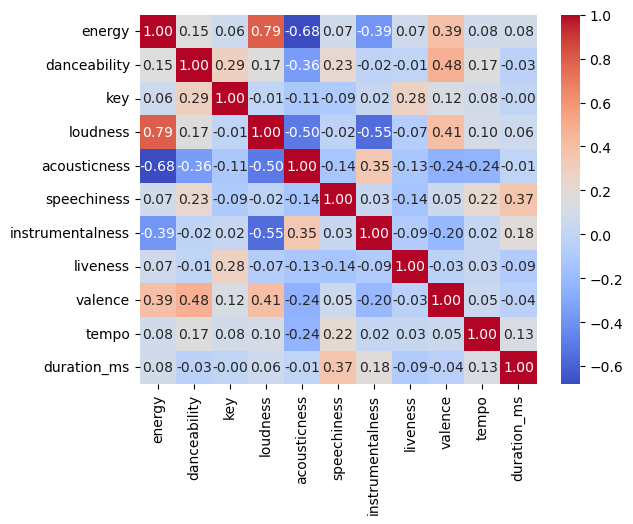

In [25]:
# Select columns with numerical values
num_cols = df.select_dtypes(include=["float64", "int64"])
# compute the pairwise correlation between the numerical columns
corr_matrix = num_cols.corr()

# plot the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f");

Strong Positive Correlation is between:  <b> Energy and Loudness </b> , while Strong Negative correlation is between: <b> Energy and Accousticness </b>.
> <b> Strong positive correlation </b>  - two variables tend to increase or decrease together. <br>
<b> Strong negative correlation </b> - two variables tend  to move to opposite directions, such as if one increases, other tends to decrease.

In [26]:
# Find feature pairs with low correlation
low_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i,j] > -0.1 and corr_matrix.iloc[i,j] < 0.1:
            low_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# Print the feature pairs with low correlation
if low_corr_pairs:
    print(f"Conclusion: Feature pairs with low correlation (-0.1 to 0.1):\n")
    for pair in low_corr_pairs:
        print(pair)
else:
    print("No feature pairs with low correlation found.")

Conclusion: Feature pairs with low correlation (-0.1 to 0.1):

('energy', 'key')
('energy', 'speechiness')
('energy', 'liveness')
('energy', 'tempo')
('energy', 'duration_ms')
('danceability', 'instrumentalness')
('danceability', 'liveness')
('danceability', 'duration_ms')
('key', 'loudness')
('key', 'speechiness')
('key', 'instrumentalness')
('key', 'tempo')
('key', 'duration_ms')
('loudness', 'speechiness')
('loudness', 'liveness')
('loudness', 'duration_ms')
('acousticness', 'duration_ms')
('speechiness', 'instrumentalness')
('speechiness', 'valence')
('instrumentalness', 'liveness')
('instrumentalness', 'tempo')
('liveness', 'valence')
('liveness', 'tempo')
('liveness', 'duration_ms')
('valence', 'tempo')
('valence', 'duration_ms')


### Feature comparison between genres
There I will provide answer to further questions:
* How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
* How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?


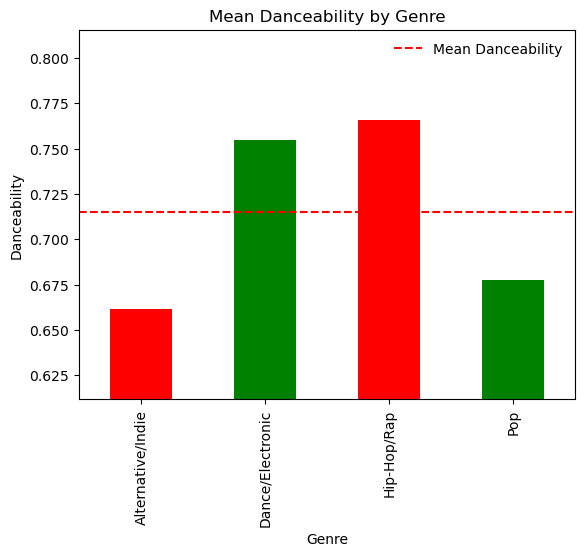

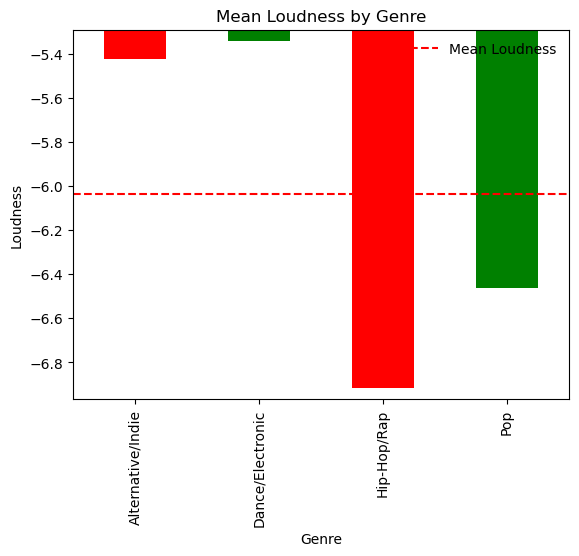

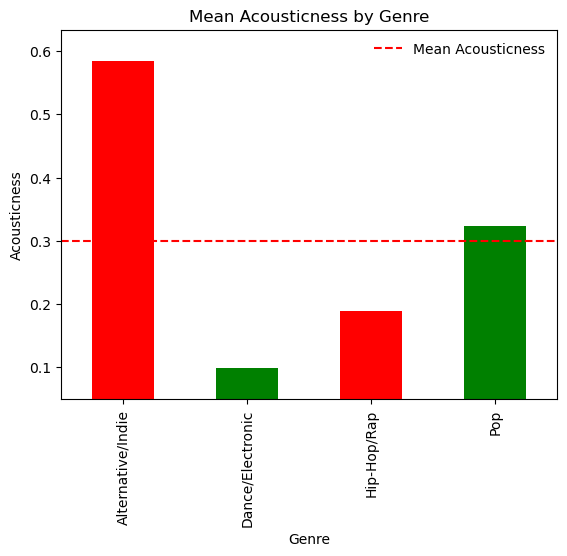

In [27]:
# Selected genres
selected_genres = ["Pop", "Hip-Hop/Rap", "Dance/Electronic", "Alternative/Indie"]

# Function to plot genre means
def plot_genre_means(feature: str):
    """
    Given a feature as input, this function generates a bar plot showing the
    average value of the given feature across different music genres.
    
    Parameters:
    feature (str): the name of the feature to plot
    
    Returns:
    None: the function only generates a plot and displays it using pyplot.show()
    """
    df2 = df[df["genre"].isin(selected_genres)]
    df2 = df2.groupby("genre")[feature].mean().reset_index()

    fig, ax = plt.subplots()
    df2.plot.bar(x="genre", y=feature, color=["red", "green"], ax=ax)
    ax.set_ylim(df2[feature].min() - 0.05, df2[feature].max() + 0.05)
    ax.set_ylabel(feature.capitalize())
    ax.set_xlabel("Genre")
    ax.set_title(f"Mean {feature.capitalize()} by Genre")

    mean_value = df2[feature].mean()  # calculate the mean of the feature column
    ax.axhline(
        mean_value, color="red", linestyle="--"
    )  # draw a horizontal line at the mean value
    ax.legend(["Mean " + feature.capitalize()], loc="upper right", frameon=False)

    plt.show()

# Call the function for different features
plot_genre_means("danceability")
plot_genre_means("loudness")
plot_genre_means("acousticness")


<b><u> Conclusion: </u></b> While comparing mean features for selected genres, it's evident that Hip-Hop/ Rap genre has highest <b> mean danceability </b> , while Dance/ Electronic has highest <b> mean loudness</b>. Also Alternative/ Indie has highest <b> mean accousticness </b> among selected genres.

# Areas for improvement.

> <b> 1. </b> Boxplot is a nice way to check for the outliers, but using other library (plotly) or simply generating dataframe with the track names and outliers values would give more reasonable information. 
<br> <b> 2. </b> I could have renamed feature columns in more meaningful way.
<br> <b> 3. </b> I could have used Seaborn library more, because graphs look way nicer. Example is below.

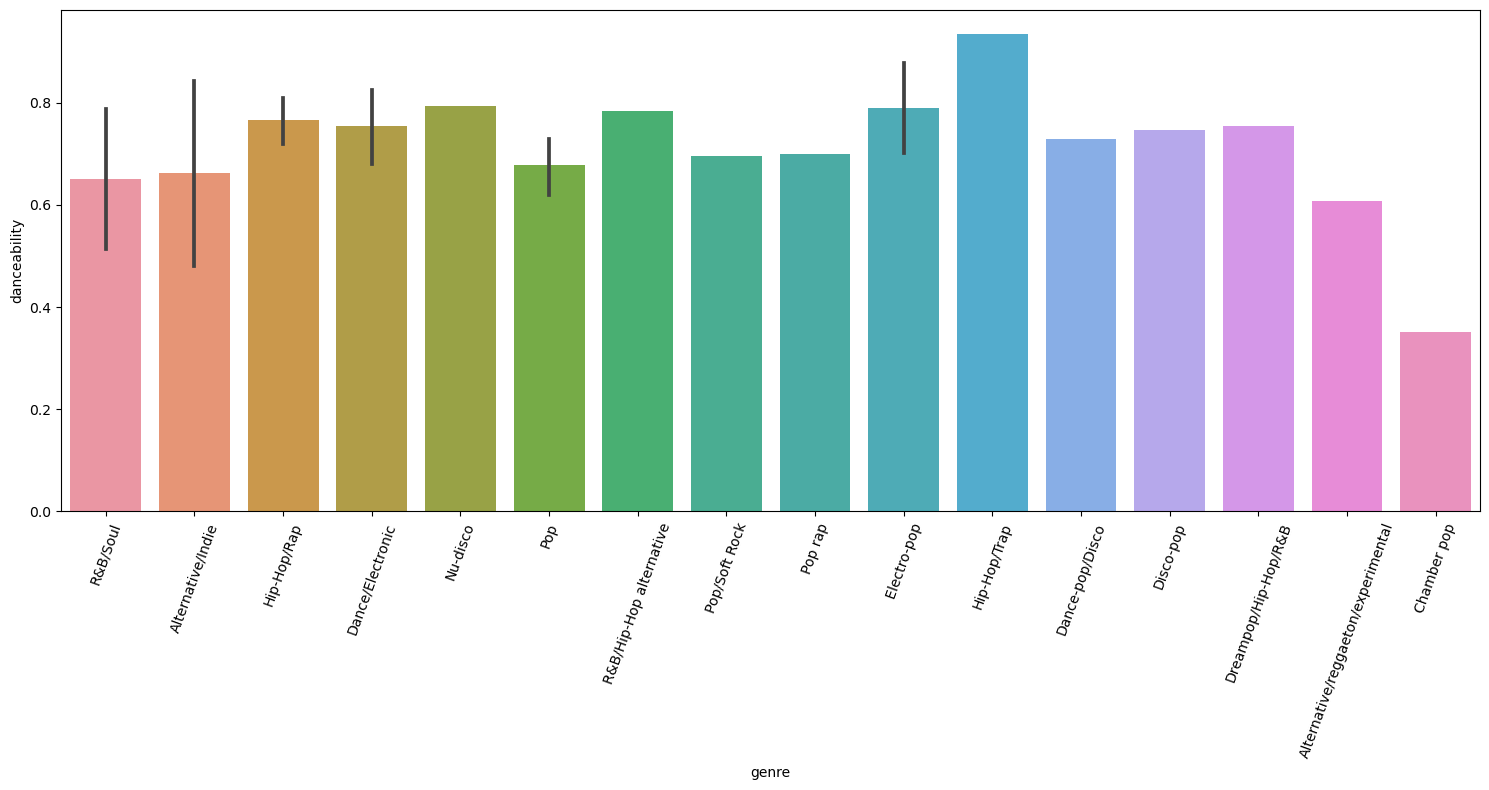

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='genre', y='danceability', data=df)
plt.xticks(rotation=70)
plt.tight_layout()

# General Conclusions.
Main conclusions drawn from the dataset are listed below:
> * Dataset has no missing values, no duplicates and while there are many outliers, best is to keep them as they are.
> * Exploratory Data Analysis findings were listed above. Main important aspects are: Pop is the most popular genre, Future Nostalgia is the most popular album and Travis Scott, Dua Lipa and Billie Eilish are the most popular artists.
> * This is great begginer dataset that gives ample opportunities to try different insight extraction methods.
> * All stated goals were met.

# Thank you for your attention!